# Part 1. Word2Vec

The data in IA3-1.csv has the information about 11914 cars. There are two fields: Maker_Model and description. The description column contains a set of tags (separated by comma) where the Maker_Model is also included.

## 1. Prepare the data for a gensim Word2Vec model

In [1]:
import pandas as pd
import gensim

In [2]:
df = pd.read_csv('IA3-1.csv')
df.head()

,description,Maker_Model
0,"premium unleaded (required),MANUAL,rear wheel ...",BMW 1 Series M
1,"premium unleaded (required),MANUAL,rear wheel ...",BMW 1 Series
2,"premium unleaded (required),MANUAL,rear wheel ...",BMW 1 Series
3,"premium unleaded (required),MANUAL,rear wheel ...",BMW 1 Series
4,"premium unleaded (required),MANUAL,rear wheel ...",BMW 1 Series


In [4]:
tags = [ row.split(',') for row in df['description']]
tags

[['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Factory Tuner',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series M'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Compact',
  'Convertible',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Serie

## 2. Run the model (with size = 50) and display the vector for ‘Toyota Camry’) 

In [5]:
# min_count: word appearance >= 1
# vector_size: num of dimensions of a vector
# workers: num cores to compute
# window: n-gram window size
# sg: use skip-gram
model = gensim.models.Word2Vec(tags, min_count=1, vector_size=50, workers=3, window=3, sg=1)

In [7]:
model.wv.__getitem__('Toyota Camry')

array([-0.03257442,  0.10268106,  0.05133251, -0.08126821, -0.04476543,
       -0.20316273,  0.00437706,  0.2899717 , -0.0943922 , -0.05010704,
        0.04526502,  0.00974962,  0.11281371, -0.02091531, -0.05877209,
        0.18398522,  0.13754356,  0.29313245, -0.11808873, -0.3053182 ,
       -0.06066785, -0.02156102,  0.25341022,  0.04168575,  0.19615577,
        0.00340548, -0.06307437,  0.36286184, -0.03705594, -0.03713639,
        0.01120233,  0.05365317,  0.0258172 ,  0.03413403,  0.09970346,
       -0.0998283 ,  0.19155574, -0.04429158,  0.01262433,  0.07305046,
        0.12166835, -0.03833221, -0.2172785 ,  0.11899189,  0.34211892,
        0.00513579, -0.0367426 , -0.16822858, -0.00295011,  0.05936398],
      dtype=float32)

## 3. Compute the similarity between 'Porsche 718 Cayman' and 'Nissan Van'

In [8]:
model.wv.similarity('Porsche 718 Cayman', 'Nissan Van')

0.8305937

## 4. Find the five most similar to 'Mercedes-Benz SLK-Class' 

In [9]:
model.wv.most_similar('Mercedes-Benz SLK-Class')

[('Audi S3', 0.9901366829872131),
 ('Mercedes-Benz SLS AMG GT', 0.9899120330810547),
 ('Audi RS 5', 0.987918496131897),
 ('BMW 8 Series', 0.9871882796287537),
 ('Toyota MR2 Spyder', 0.986138641834259),
 ('BMW M', 0.9854121804237366),
 ('Porsche Boxster', 0.9852081537246704),
 ('Lamborghini Murcielago', 0.9845797419548035),
 ('Ford Shelby GT350', 0.9842182993888855),
 ('BMW M6', 0.9841594696044922)]

## 5. Generate a t-SNE graph for a list of 50 unique cars.

TSNE(t-distributed stochastic neigborhood embedding)  
In t-SNE, the goal is to map high-dimensional data points to a low-dimensional space while preserving their pairwise similarities.

In [10]:
from sklearn.manifold import TSNE

In [11]:
# get cars' vectors
cars = df['Maker_Model'].unique().tolist()
X = model.wv.__getitem__(cars)

In [18]:
# 928 cars, each with 50 dims
X.shape

(928, 50)

In [22]:
# transform originally 50 dimensions to 2 dims in order to plot
# Perplexity is a parameter used in the algorithm that helps determine the size of the neighborhood 
# used to calculate the probabilities in the high-dimensional space.
tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1000, random_state=100)
Y = tsne_model.fit_transform(X)

In [29]:
# pick only first 50 to plot
Y50 = Y[:50]

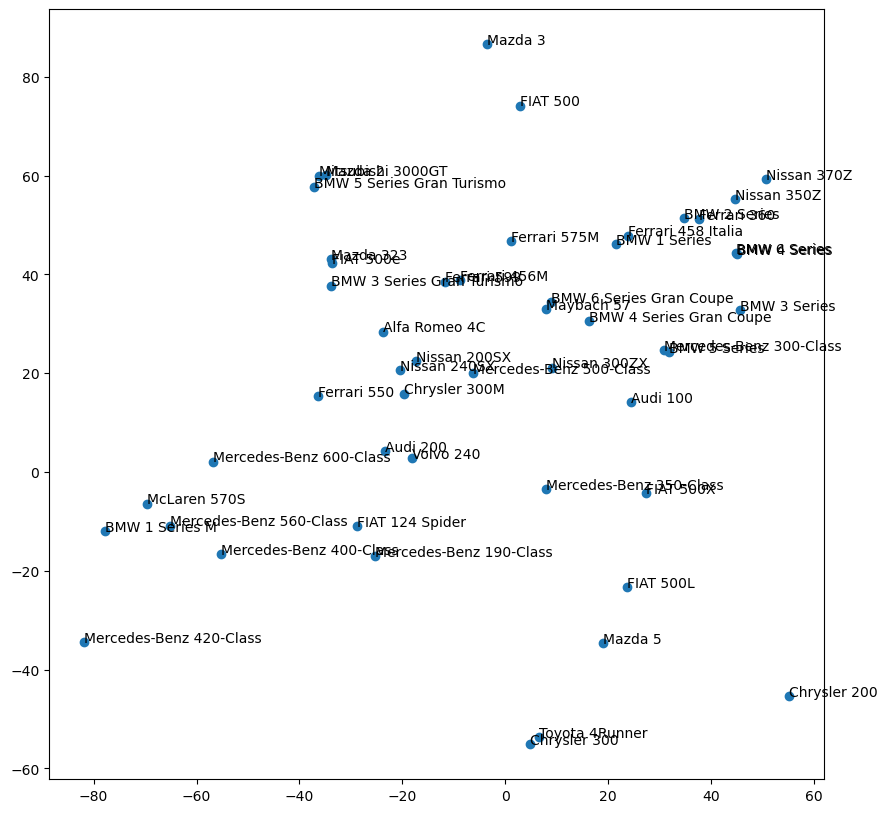

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(Y50[:,0], Y50[:,1])

for i, car in enumerate(cars[:50]):
    plt.annotate(car, xy=(Y50[i,0], Y50[i,1]))

# Part 2. Topic Model 

There are 1000 reviews for restaurants and films in a collection under the IA3-2.csv file. All of those reviews are saved as text files. In this assignment, you are required to investigate the topics of those reviews.

In [35]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.decomposition import LatentDirichletAllocation

In [219]:
df = pd.read_excel('IA3-2.xlsx')
df.head()

,id,review,label
0,1,About the shop: There is a restaurant in Soi L...,restaurant
1,2,About the shop: Through this store for about t...,restaurant
2,3,Roast Coffee &amp; Eatery is a restaurant loca...,restaurant
3,4,Eat from the children. The shop is opposite. P...,restaurant
4,5,The Ak 1 shop at another branch tastes the sam...,restaurant


## 1. Transform those reviews into a term-document matrix, lemmatize all the words, remove the stop-words and punctuations, set the minimal document frequency for each term to be 5 and include 2-gram.

In [220]:
# lemmatize, remove stop-words
lemmatizer = nltk.stem.WordNetLemmatizer()
processed_review = []
for doc in df['review']:
    tokens = nltk.word_tokenize(doc.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if not token in stopwords.words('english')]
    processed_review.append(" ".join(tokens))

In [221]:
# Use TFIDF to set the minimal document frequency for each term to be 5 and include 2-gram
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df = 5)
vectorizer.fit(processed_review)
X = vectorizer.transform(processed_review)
print(X.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.13698245 ... 0.         0.         0.        ]]


## 2. Use the LDA model to extract the topics of each document. In particular, we assume there are 6 topics.

In [222]:
lda = LatentDirichletAllocation(n_components=6).fit(X)

In [223]:
lda.components_ # counts(prob) of word j to appear in topic i

array([[1.28920483, 1.36559168, 2.19168414, ..., 0.35056112, 2.3615017 ,
        0.21554325],
       [0.16667049, 0.16666892, 0.1666688 , ..., 0.16667155, 0.16668615,
        0.16667888],
       [0.16667054, 0.16666895, 0.16666883, ..., 0.16667162, 0.1666864 ,
        0.16667904],
       [0.16667054, 0.16666895, 0.16666883, ..., 0.16667162, 0.16668641,
        0.16667904],
       [0.1666701 , 0.1666674 , 0.16668607, ..., 0.16687853, 0.24384703,
        4.41711932],
       [0.16667053, 0.16666894, 0.16666883, ..., 0.1666716 , 0.16668635,
        0.16667901]])

In [224]:
lda.components_.shape

(6, 6258)

In [225]:
terms = vectorizer.get_feature_names_out()

## 3. Report the topic distribution and the top-2 topics of the first 10 restaurant reviews (id = [1:10]) and the first 10 movie reviews (id = [501:510]).

In [226]:
# First 10 restaurant reviews
lda.transform(X[0:10])

array([[0.01567623, 0.15112103, 0.01558031, 0.01558032, 0.7864618 ,
        0.01558031],
       [0.01759481, 0.18356539, 0.01576118, 0.01576118, 0.75152571,
        0.01579174],
       [0.01564439, 0.01539142, 0.01539131, 0.01539131, 0.92279027,
        0.0153913 ],
       [0.24464539, 0.01947687, 0.01947691, 0.01947691, 0.67744704,
        0.0194769 ],
       [0.19124413, 0.02767625, 0.0276763 , 0.02767631, 0.69805072,
        0.02767629],
       [0.01676469, 0.01647329, 0.01647172, 0.01647172, 0.91734687,
        0.01647171],
       [0.01884125, 0.01820465, 0.01820468, 0.01820468, 0.90834007,
        0.01820467],
       [0.01927809, 0.01921875, 0.01921877, 0.01921877, 0.90384684,
        0.01921877],
       [0.04475409, 0.04472161, 0.04472162, 0.04472162, 0.77635944,
        0.04472162],
       [0.04110911, 0.04050126, 0.04050136, 0.04050136, 0.79688477,
        0.04050214]])

In [227]:
# Distribution of  each topic: probabilities of topics rounded to 3 decimals
for i in range(0,10):
    id = i+1
    print('Review ID %d' %id)
    for j in range(0,6):
        print('Topic '+str(j)+':', round(lda.transform(X[0:10])[i][j], 3),str(','), end=' ')
    print()
    print('-----------')

Review ID 1
Topic 0: 0.016 , Topic 1: 0.151 , Topic 2: 0.016 , Topic 3: 0.016 , Topic 4: 0.786 , Topic 5: 0.016 , 
-----------
Review ID 2
Topic 0: 0.018 , Topic 1: 0.184 , Topic 2: 0.016 , Topic 3: 0.016 , Topic 4: 0.752 , Topic 5: 0.016 , 
-----------
Review ID 3
Topic 0: 0.016 , Topic 1: 0.015 , Topic 2: 0.015 , Topic 3: 0.015 , Topic 4: 0.923 , Topic 5: 0.015 , 
-----------
Review ID 4
Topic 0: 0.245 , Topic 1: 0.019 , Topic 2: 0.019 , Topic 3: 0.019 , Topic 4: 0.677 , Topic 5: 0.019 , 
-----------
Review ID 5
Topic 0: 0.191 , Topic 1: 0.028 , Topic 2: 0.028 , Topic 3: 0.028 , Topic 4: 0.698 , Topic 5: 0.028 , 
-----------
Review ID 6
Topic 0: 0.017 , Topic 1: 0.016 , Topic 2: 0.016 , Topic 3: 0.016 , Topic 4: 0.917 , Topic 5: 0.016 , 
-----------
Review ID 7
Topic 0: 0.019 , Topic 1: 0.018 , Topic 2: 0.018 , Topic 3: 0.018 , Topic 4: 0.908 , Topic 5: 0.018 , 
-----------
Review ID 8
Topic 0: 0.019 , Topic 1: 0.019 , Topic 2: 0.019 , Topic 3: 0.019 , Topic 4: 0.904 , Topic 5: 0.019

In [228]:
# Top 2 topics of each review(reported by topic number)
for i in range(0,10):
    id = i+1
    print('Review ID %d' %id)
    t2, t1 = lda.transform(X[0:10])[i].argsort()[-2:]
    print('Top 1:', t1,'Top 2:', t2)
    print('-----------')

Review ID 1
Top 1: 4 Top 2: 1
-----------
Review ID 2
Top 1: 4 Top 2: 1
-----------
Review ID 3
Top 1: 4 Top 2: 0
-----------
Review ID 4
Top 1: 4 Top 2: 0
-----------
Review ID 5
Top 1: 4 Top 2: 0
-----------
Review ID 6
Top 1: 4 Top 2: 0
-----------
Review ID 7
Top 1: 4 Top 2: 0
-----------
Review ID 8
Top 1: 4 Top 2: 0
-----------
Review ID 9
Top 1: 4 Top 2: 0
-----------
Review ID 10
Top 1: 4 Top 2: 0
-----------


In [229]:
# First 10 movie reviews
lda.transform(X[500:510])

# Distribution of  each topic: probabilities of topics rounded to 3 decimals
for i in range(0,10):
    id = i+501
    print('Review ID %d' %id)
    for j in range(0,6):
        print('Topic '+str(j)+':', round(lda.transform(X[500:510])[i][j], 3),str(','), end=' ')
    print()
    print('-----------')

Review ID 501
Topic 0: 0.918 , Topic 1: 0.016 , Topic 2: 0.016 , Topic 3: 0.016 , Topic 4: 0.016 , Topic 5: 0.016 , 
-----------
Review ID 502
Topic 0: 0.927 , Topic 1: 0.012 , Topic 2: 0.012 , Topic 3: 0.012 , Topic 4: 0.024 , Topic 5: 0.012 , 
-----------
Review ID 503
Topic 0: 0.944 , Topic 1: 0.011 , Topic 2: 0.011 , Topic 3: 0.011 , Topic 4: 0.011 , Topic 5: 0.011 , 
-----------
Review ID 504
Topic 0: 0.862 , Topic 1: 0.028 , Topic 2: 0.028 , Topic 3: 0.028 , Topic 4: 0.028 , Topic 5: 0.028 , 
-----------
Review ID 505
Topic 0: 0.924 , Topic 1: 0.015 , Topic 2: 0.015 , Topic 3: 0.015 , Topic 4: 0.015 , Topic 5: 0.015 , 
-----------
Review ID 506
Topic 0: 0.915 , Topic 1: 0.017 , Topic 2: 0.017 , Topic 3: 0.017 , Topic 4: 0.017 , Topic 5: 0.017 , 
-----------
Review ID 507
Topic 0: 0.91 , Topic 1: 0.018 , Topic 2: 0.018 , Topic 3: 0.018 , Topic 4: 0.018 , Topic 5: 0.018 , 
-----------
Review ID 508
Topic 0: 0.857 , Topic 1: 0.029 , Topic 2: 0.029 , Topic 3: 0.029 , Topic 4: 0.029 ,

In [230]:
# Top 2 topics of each review(reported by topic number)
for i in range(0,10):
    id = i+501
    print('Review ID %d' %id)
    t2, t1 = lda.transform(X[500:510])[i].argsort()[-2:]
    print('Top 1:', t1,'Top 2:', t2)
    print('-----------')

Review ID 501
Top 1: 0 Top 2: 4
-----------
Review ID 502
Top 1: 0 Top 2: 4
-----------
Review ID 503
Top 1: 0 Top 2: 4
-----------
Review ID 504
Top 1: 0 Top 2: 4
-----------
Review ID 505
Top 1: 0 Top 2: 4
-----------
Review ID 506
Top 1: 0 Top 2: 4
-----------
Review ID 507
Top 1: 0 Top 2: 4
-----------
Review ID 508
Top 1: 0 Top 2: 4
-----------
Review ID 509
Top 1: 0 Top 2: 4
-----------
Review ID 510
Top 1: 0 Top 2: 4
-----------


- Note: 
I used argsort to find the top two topics of a given review, but argsort( ) can not handle well when there are tied elements in an array.  
  
    When checking the array of each review, I have noticed that it looks like there are tied elements in a given review when displayed in eight decimals. Take id 1 for example, the array shows as follows:  [[0.01558005, 0.78980687, 0.14787295, 0.01558005, 0.01558005, 0.01558003]]  
 
    While it may  seemed like there are three elements(0.01558005) can be ranked as 2nd, I further used unique( ) function to see if there are really a tie, or it is just because of array decimal display setting.
 
    It turned out that even though some elements looked equal when displayed in eight decimals, they are actually not the same. Therefore, using argsort( ) in the above codes to find top two is still valid

In [231]:
for i in range(0,10):
    print(len(np.unique(lda.transform(X[i]))))

6
6
6
6
6
6
6
6
6
6


In [232]:
for i in range(500,510):
    print(len(np.unique(lda.transform(X[i]))))

6
6
6
6
6
6
6
6
6
6


## 4. Find the top-5 terms (terms with the top-5 highest weights) for each of the 6 topics. Based on those terms, describe what those topics are about. 

In [233]:
for i, topic in enumerate(lda.components_):
    print('Topic %d:' % i )
    # for each topic, get the top 5 terms
    for j in topic.argsort()[:-6:-1]:
        print(terms[j])
    print('--------------')

Topic 0:
quot
film
wa
love
ha
--------------
Topic 1:
gt good
berry
exceeded
win competition
average price
--------------
Topic 2:
jia
fine
live
star
shanghai
--------------
Topic 3:
fifth
thonglor
located soi
forget
located
--------------
Topic 4:
delicious
food
eat
restaurant
good
--------------
Topic 5:
town
old one
describe
typical
south
--------------


## 5. Based on finding in 3 and 4, describe what review 1 [ID=1] and review 501 [ID=501] are about? 

- Review 1
    Top topics for review 1 are: topic 4 (~0.8) 1 and topic 1 (~0.15). It is clear that this review is talking about how good this restaurant or its food was. In particular, popular terms of these two topics are 'good', 'eat', 'delicious', 'food', 'restaurant', and 'berry'.
 
- Review 501:
     Top topic for review 1 is: topic 0 (~0.9). Other topics makes up only 1.6% of the total. This review's main idea is not as clear as review 1. From the popular words in topic 0, it tells us that it is a review about a 'film'. Words like 'love' and 'ha' may indicates a positive attitude toward the film. 'wa' and 'quot'('quote', maybe?) do not provide much information here.

# Part 3. CNN – Digit Recognition

We build a classifier based on CNN to recognize hand-written digits 0-9. We are using the mnist
(Modified National Institute of Standards and Technology) dataset, which can be loaded:
(train_digits, train_labels), (test_digits, test_labels) = datasets.mnist.load_data()
It contains black-white images (28 x 28 pixels) and their labels of hand-written digit (60000 in training set and 10000 in test set).

In [234]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2023-03-02 16:22:35.060524: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [235]:
(train_digits, train_labels), (test_digits, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


## 1. Plot first 9 images:

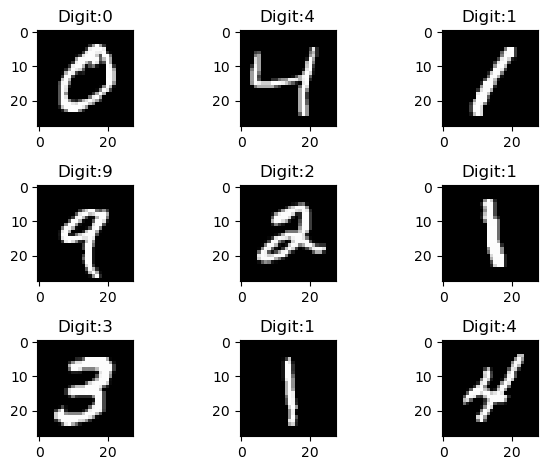

In [253]:
fig, axs = plt.subplots(3, 3)

for r in range(0, 3):
    for c in range(0, 3):
        num = r*3+1+c
        axs[r, c].imshow(train_digits[num], cmap='gray')
        axs[r, c].set_title('Digit:'+str(train_labels[num]))

plt.tight_layout()
plt.show()

## 2. Prepare the data

In [254]:
train_digits = train_digits.reshape(60000,28,28,1)
# one-hot ecoded for labels
train_labels = tf.keras.utils.to_categorical(train_labels, 10)

In [257]:
test_digits = test_digits.reshape(10000,28,28,1)
# one-hot ecoded for labels
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

## 3. Build your CNN model with Conv2D with (3, 3) filters and MaxPooling2D((2, 2)). Show the summary of your model. 

In [340]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
#model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.3))


In [341]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [342]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 1600)              0         
                                                                 
 dense_36 (Dense)            (None, 64)              

## 4. Compile and train your model. Consider the choices of optimizer, loss, and epochs. What are your accuracy and val_accuracy?

In [347]:
model.compile(optimizer='adam',
              # as the labels are one-hot encoded, use categorical_crossentropy, not SparseCategoricalCrossentropy
              loss=tf.keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

history = model.fit(train_digits, train_labels, epochs=5, 
                    validation_data=(test_digits, test_labels))

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0580 - accuracy: 0.9820 - val_loss: 0.0467 - val_accuracy: 0.9852
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0387 - accuracy: 0.9880 - val_loss: 0.0449 - val_accuracy: 0.9866
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0348 - accuracy: 0.9890 - val_loss: 0.0341 - val_accuracy: 0.9896
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0287 - accuracy: 0.9912 - val_loss: 0.0412 - val_accuracy: 0.9884
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0236 - accuracy: 0.9927 - val_loss: 0.0390 - val_accuracy: 0.9904


In [349]:
history.history['accuracy']

[0.9819666743278503,
 0.9879999756813049,
 0.9890000224113464,
 0.9912499785423279,
 0.9926833510398865]

## 5. Plot the history of model training against epoch.

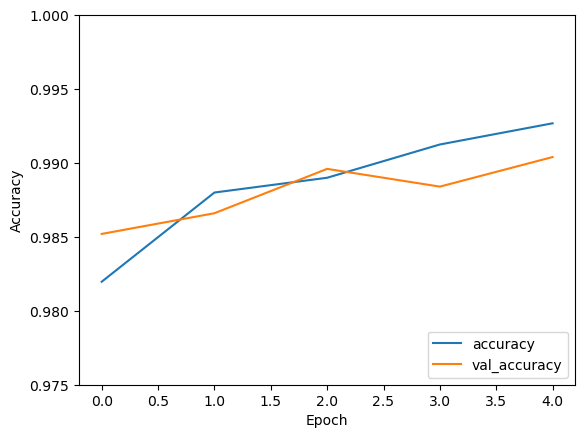

In [355]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.975, 1])
plt.legend(loc='lower right')

## 6. Evaluate the model with the test data.

In [354]:
test_loss, test_acc = model.evaluate(test_digits,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0390 - accuracy: 0.9904 - 875ms/epoch - 3ms/step
